## Task II: Familiarizing Yourself with the Dataset (Oxford Pets)

### 1) Data Overview
The Oxford-IIIT Pet Dataset contains 37 breeds of cats and dogs, with:

- 3680 images
- Class labels corresponding to pet breeds
- Varying image resolutions

In [1]:
import numpy, scipy, datasets

print(f"numpy version: {numpy.__version__}")
print(f"scipy version: {scipy.__version__}")
print(f"datasets version: {datasets.__version__}")


numpy version: 1.26.4
scipy version: 1.15.2
datasets version: 3.3.2


In [ ]:
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader

# # Load Oxford Pets dataset from torchvision
# dataset = torchvision.datasets.OxfordIIITPet(
#     root="./data",
#     download=True,
#     transform=transforms.ToTensor()
# )

# # Create a DataLoader
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# # Check dataset size
# print(f"Loaded {len(dataset)} images from Oxford Pets dataset")


In [ ]:
# Print dataset details
# print(dataset)


## 2) Load the Oxford Pets Dataset

In [2]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load both training and test datasets
train_dataset = torchvision.datasets.OxfordIIITPet(
    root="./data",
    split="trainval",  # Training + Validation set
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.OxfordIIITPet(
    root="./data",
    split="test",  # Test set
    download=True,
    transform=transform
)

# Print dataset sizes
print(f"Training Set Size: {len(train_dataset)} images")
print(f"Test Set Size: {len(test_dataset)} images")


Training Set Size: 3680 images
Test Set Size: 3669 images


## 3) Check Dataset Structure

In [3]:
# Check one sample
sample_img, sample_label = train_dataset[0]

# Print details
print(f"Sample Image Shape: {sample_img.shape}")  # Tensor format: (C, H, W)
print(f"Sample Label: {sample_label}")  # Label as an integer


Sample Image Shape: torch.Size([3, 500, 394])
Sample Label: 0


- Images have 3 color channels (RGB).
- Different resolutions (no fixed width/height).
- Labels are integer class indices

 ## 4) Display Sample Image

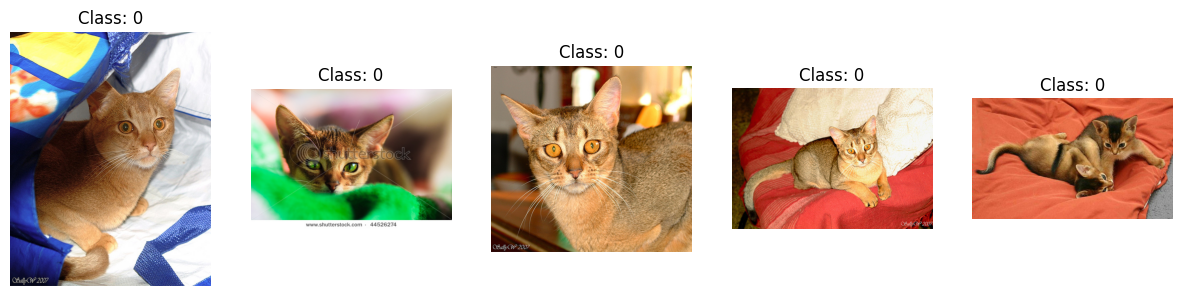

In [9]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img, label = dataset[i]  # Get image and label
        axes[i].imshow(img.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
        axes[i].axis("off")
        axes[i].set_title(f"Class: {label}")
    plt.show()

# Show sample images
show_images(train_dataset)


## 5) Analyze Image Sizes (Resolution)
- Images have different resolutions → Need resizing before training.

In [10]:
import numpy as np

# Get image sizes (width, height)
image_sizes = [train_dataset[i][0].shape[1:] for i in range(len(train_dataset))]  # (H, W)
image_sizes = np.array(image_sizes)

# Compute average size
avg_width = np.mean(image_sizes[:, 1])
avg_height = np.mean(image_sizes[:, 0])

print(f"Average Image Size: {avg_width:.2f} x {avg_height:.2f}")


Average Image Size: 431.03 x 383.42


## 6) Check Class Distribution

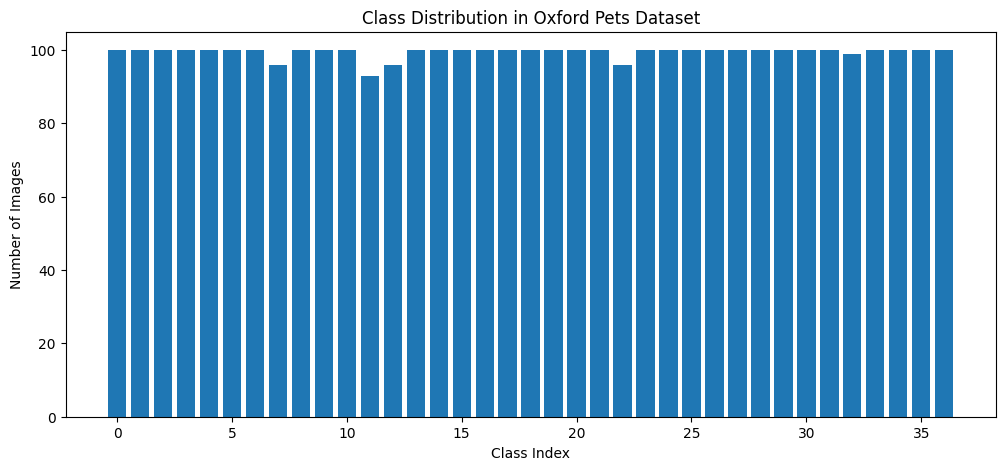

In [11]:
from collections import Counter

# Get all labels
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Count class occurrences
label_counts = Counter(train_labels)

# Plot class distribution
plt.figure(figsize=(12, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class Index")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Oxford Pets Dataset")
plt.show()
